In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
from ipypb import irange
from IPython.display import clear_output

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
N = 1024
x = np.random.randn(N,3)*10
y = np.matmul(x, np.c_[[1,2,3]]) + 4 + np.random.randn(N,1)
x.shape, y.shape

((1024, 3), (1024, 1))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.ds1 = nn.Linear(3, 1);
    def forward(self, x):
        return self.ds1(x)
    
net = Net().to(device)
net

Net(
  (ds1): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
net.train()
hist = []
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(net.parameters())
batch_size = 128
y
for epoch in range(10000):y
    argseq = np.arange(N)
    np.random.shuffle(argseq)
    for batch in range(0, N, batch_size):
        if argseq[batch:].size < batch_size:
            break
        sel = argseq[batch:][:batch_size]
        x_batch = torch.from_numpy(x[sel,:]).float().to(device)
        y_batch = torch.from_numpy(y[sel]).float().to(device)
        loss = criterion(net(x_batch), y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    hist.append(loss.data.cpu().numpy() + 0)
    clear_output(wait=True)
    plt.figure(figsize=(12,5))
    plt.plot(np.log10(np.r_[hist]), 'k.')
    plt.show()        

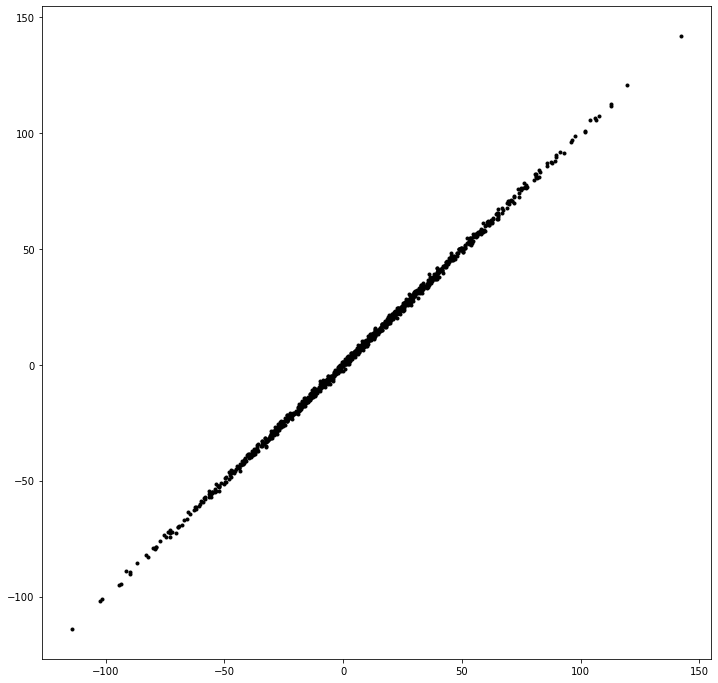

In [16]:
net.eval()
y_pred = net(torch.from_numpy(x).float().to(device)).data.cpu().numpy()

plt.figure(figsize=(12,12))
plt.plot(y, y_pred, 'k.')
plt.show()

In [21]:
for param in net.parameters():
    print(param.data)

tensor([[0.9978, 2.0024, 3.0003]], device='cuda:0')
tensor([3.9901], device='cuda:0')
